Importacao de Bibliotecas

In [12]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# importando a biblioteca scikit-learn dataset
from sklearn import datasets

sns.set()
# ignorando os warnings
import warnings
warnings.filterwarnings('ignore')
# plotando o matplotl
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
pd.set_option('display.max_columns', None)

## Importando Dataset de Amostra de Clientes

In [3]:
dados = pd.read_csv(r'D:/Estudos/DataScience/DataSets/DH_DS3_Telecom_Amostra.csv', encoding = 'latin1', 
                 engine='python', 
                 delimiter=';', 
                 decimal=",")
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,"R$ 29,85","R$ 29,85",No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,"R$ 56,95","R$ 1.889,50",No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"R$ 53,85","R$ 108,15",Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"R$ 42,30","R$ 1.840,75",No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"R$ 70,70","R$ 151,65",Yes


#### Realizando a transformacao dos dados monetarios

In [4]:
dados['MonthlyCharges'] = dados['MonthlyCharges'].replace('[R$]', '', regex=True)
dados['MonthlyCharges'] = dados['MonthlyCharges'].replace('[,]', '.', regex=True)
dados['MonthlyCharges'] = dados['MonthlyCharges'].astype(float)

dados['TotalCharges'] = dados['TotalCharges'].replace('[R$]', '', regex=True)
dados['TotalCharges'] = dados['TotalCharges'].replace('[.]', '', regex=True)
dados['TotalCharges'] = dados['TotalCharges'].replace('[,]', '.', regex=True)
dados['TotalCharges'] = dados['TotalCharges'].str.strip()
#dados['TotalCharges'] = dados['TotalCharges'].astype(float)
dados.sort_values(by=['TotalCharges']).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


In [5]:
dados['TotalCharges'].loc[dados[dados['TotalCharges'] == ''].index] = 0
dados['TotalCharges'] = dados['TotalCharges'].astype(float)

In [6]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


# Explorando os dados

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [8]:
pp.ProfileReport(dados)

Number of variables,21
Number of observations,7043
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,168.0 B
Numeric,3
Categorical,16
Boolean,1
Date,0
Text (Unique),1
Rejected,0


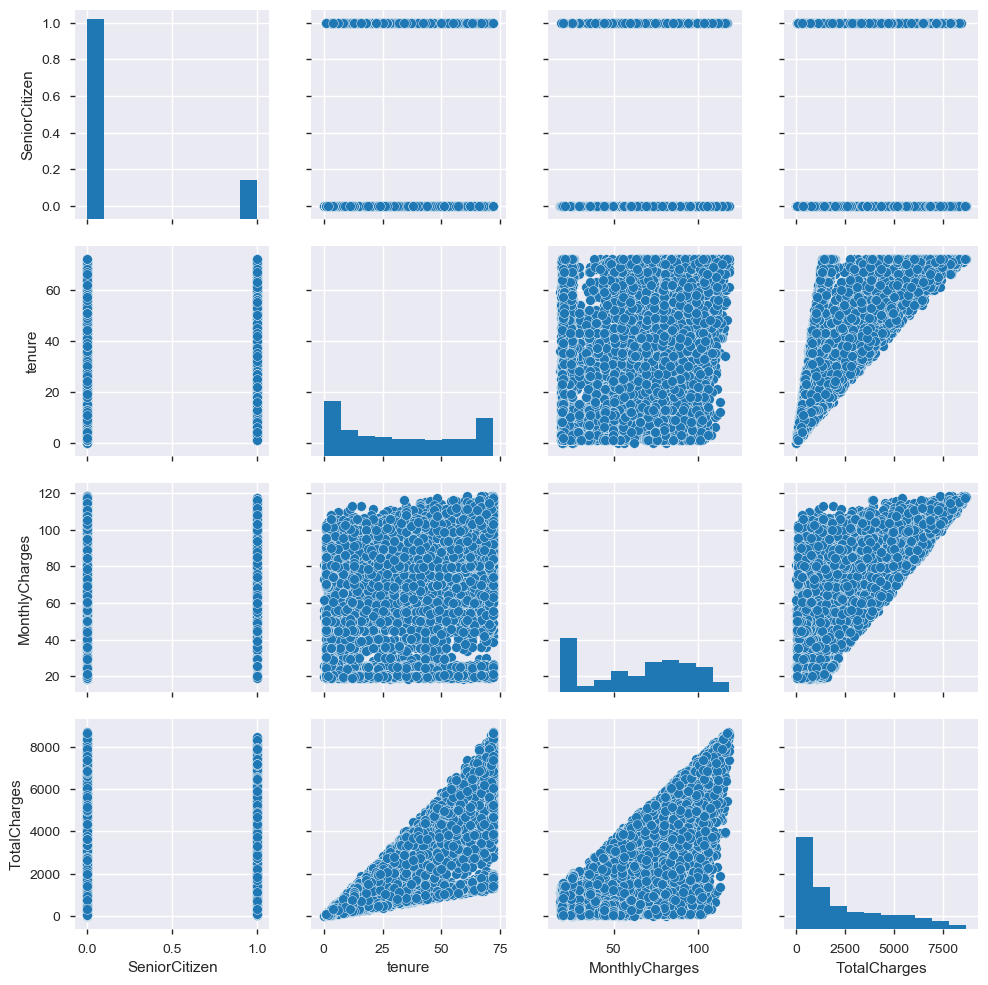

In [9]:

sns.pairplot(dados)

### Verficando a necessidade de Balancear os dados com relacao a variavel target

In [10]:
# verificando o tamanho das classes por groupby
dados.groupby('Churn').InternetService.count()

Churn
No     5174
Yes    1869
Name: InternetService, dtype: int64